# Adapted from WRF-python official page: 
https://wrf-python.readthedocs.io/en/latest/plot.html#vertical-cross-section

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
import os
from wrf import to_np, getvar, CoordPair, vertcross


In [7]:
## Define my own custom filepath, from where I should ingest wrf data
myPath   = r'/home/olddog/Documents/Python_Scipts/WRF_nesting_prediction_Web/dataTest'
filename = 'wrfout_d03_2022-05-06_01:00:00'

In [40]:
ncfile = Dataset(os.path.join(myPath, filename))

# Extract the model height and wind speed
z = getvar(ncfile, "z")/1000
wspd =  getvar(ncfile, "uvmet_wspd_wdir", units="kt")[0,:] # new way of indexing
wspd =  getvar(ncfile, "rh") # new way of indexing

In [91]:
## Nicosia coordinates:
lat_N, lon_N = 35.1856, 33.3823

#Apostolos Andreas Monastery/Coordinates
lat_start, lon_start =35.6594, 34.5743

# Paphos coordinates
lat_end, lon_end =34.7754, 32.4218


In [59]:
# Create the start point and end point for the cross section
start_point = CoordPair(lat_start, lon_start)
end_point = CoordPair(lat_end, lon_end)

In [60]:
# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

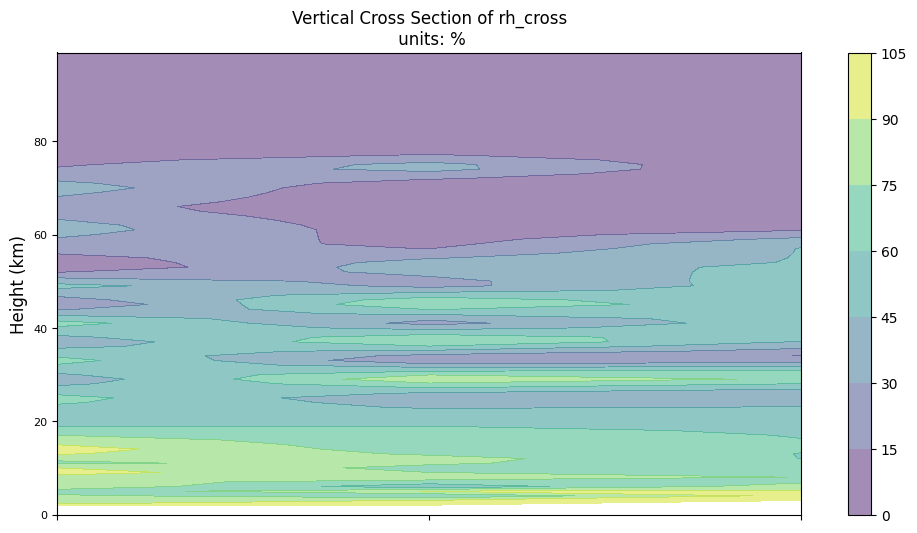

In [98]:
# Create the figure
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross),alpha = .5)
#ax.contour(to_np(wspd_cross),levels = [wspd_cross.mean(), 1.2*wspd_cross.mean()])


# Add the color bar
plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
x_labels = []
n = -1
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, fontsize=8)

# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(vert_vals[::20], fontsize=8)

# Set the x-axis and  y-axis labels
#ax.set_xlabel("Latitude, Longitude", fontsize=12)
import matplotlib as mpl
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel("Height (km)", fontsize=12)

plt.title("Vertical Cross Section of {}\n units: {}".format(wspd_cross.name, wspd_cross.units))

plt.show()

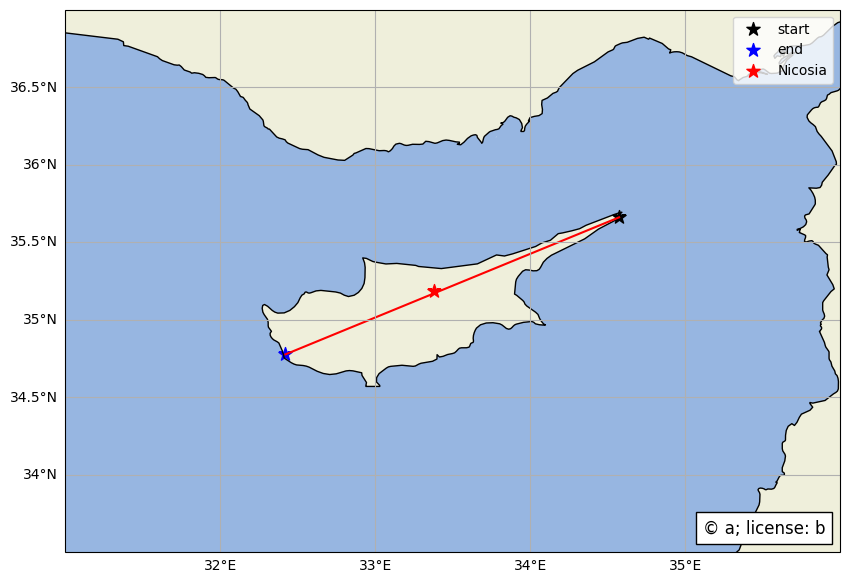

In [92]:
# Add a Map to show the projection of the cross section line on it: 


import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection=crs.PlateCarree())
ax.set_extent([31, 36, 33.5, 37], crs=crs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN, zorder=0)


# Add a text annotation for the license information to the
# the bottom right corner.

SOURCE, LICENSE = 'a','b'
text = AnchoredText('\u00A9 {}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': 12}, frameon=True)

ax.plot([lon_start, lon_end], [lat_start, lat_end],'r')
ax.scatter(lon_start, lat_start, s= 100, c = 'k',marker = '*', label = 'start')
ax.scatter(lon_end, lat_end, s= 100, c = 'b',marker = '*', label = 'end')
ax.scatter(lon_N, lat_N, s= 100, c = 'r',marker = '*', label = 'Nicosia')
plt.legend()

ax.add_artist(text)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

plt.show()

